# Modelagem do problema

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
X_train = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\X_train.csv')
y_train = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\y_train.csv').squeeze()
X_test = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\X_test.csv')
y_test = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\y_test.csv').squeeze()

In [123]:
print(f"X pronto: {X_train.shape[1]} colunas e {X_train.shape[0]} linhas.")
print(f"y pronto: {y_train.shape[0]} alvos.")

X pronto: 21 colunas e 9342 linhas.
y pronto: 9342 alvos.


In [124]:
print(f"Tamanho do Treino: {X_train.shape}")
print(f"Tamanho do Teste Final: {X_test.shape}")
print(f"Tamanho do y Treino: {y_train.shape}")

Tamanho do Treino: (9342, 21)
Tamanho do Teste Final: (2336, 21)
Tamanho do y Treino: (9342,)


## Random Forest (COM SOPRO)

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,      
    max_depth=None,         
    random_state=42,
    n_jobs=-1               
)

In [126]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
print("\nIniciando Cross-Validation (5-Folds)...")
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print(f"\nResultados por Fold: {cv_scores}")
print(f"Acurácia Média: {cv_scores.mean():.4f}")
print(f"Desvio Padrão: +/- {cv_scores.std():.4f}")

print("\nTreinando modelo final para teste no Hold-Out...")
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\n--- Relatório Final no Conjunto de Teste ---")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anormal']))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Iniciando Cross-Validation (5-Folds)...

Resultados por Fold: [0.92616372 0.90904227 0.92558887 0.92987152 0.91648822]
Acurácia Média: 0.9214
Desvio Padrão: +/- 0.0076

Treinando modelo final para teste no Hold-Out...

--- Relatório Final no Conjunto de Teste ---
              precision    recall  f1-score   support

      Normal       0.91      0.96      0.93      1345
     Anormal       0.93      0.87      0.90       991

    accuracy                           0.92      2336
   macro avg       0.92      0.91      0.92      2336
weighted avg       0.92      0.92      0.92      2336

Matriz de Confusão:
[[1285   60]
 [ 129  862]]


## Random Forest (SEM SOPRO)

In [128]:
print(f"Tamanho do Treino: {X_train.shape}")
print(f"Tamanho do Teste Final: {X_test.shape}")
print(f"Tamanho do y Treino: {y_train.shape}")

Tamanho do Treino: (9342, 21)
Tamanho do Teste Final: (2336, 21)
Tamanho do y Treino: (9342,)


In [ ]:
colunas_sopro = [col for col in X_train.columns if 'sopro' in col.lower()]

print(f"Colunas sendo removidas: {colunas_sopro}")

if 'Motivo_Sopro' in colunas_sopro:
    colunas_sopro.remove('Motivo_Sopro')

print(f"Colunas sendo removidas: {colunas_sopro}")

X_train = X_train.drop(columns=colunas_sopro)
X_test = X_test.drop(columns=colunas_sopro)

print(f"\nColunas restantes: {X_train.shape[1]}")
print(X_train.columns.tolist())

Colunas sendo removidas: ['Motivo_Sopro', 'SOPRO_Ausente', 'SOPRO_Continuo', 'SOPRO_Diastolico', 'SOPRO_Sistolico', 'SOPRO_Sistolico_Diastolico']
Colunas sendo removidas: ['SOPRO_Ausente', 'SOPRO_Continuo', 'SOPRO_Diastolico', 'SOPRO_Sistolico', 'SOPRO_Sistolico_Diastolico']

Colunas restantes: 16
['IDADE', 'Sintoma_Dor', 'Sintoma_Cianose', 'Sintoma_Dispn', 'Checkup_Assintomatico', 'PPA_Alterada', 'Motivo_Cirurgia', 'Motivo_Sopro', 'Motivo_Congenita', 'B2_Desdobramento_Fixo', 'B2_Hiperfonetica', 'B2_Normal', 'B2_Outro', 'B2_Unica', 'IMC_Z', 'FC_Z']


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=500,      
    max_depth=None,        
    random_state=42,
    n_jobs=-1              
)

In [131]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
print("\nIniciando Cross-Validation (5-Folds)...")
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print(f"\nResultados por Fold: {cv_scores}")
print(f"Acurácia Média: {cv_scores.mean():.4f}")
print(f"Desvio Padrão: +/- {cv_scores.std():.4f}")

print("\nTreinando modelo final para teste no Hold-Out...")
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\n--- Relatório Final no Conjunto de Teste ---")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anormal']))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Iniciando Cross-Validation (5-Folds)...

Resultados por Fold: [0.69127876 0.68913858 0.68308351 0.69860814 0.67505353]
Acurácia Média: 0.6874
Desvio Padrão: +/- 0.0079

Treinando modelo final para teste no Hold-Out...

--- Relatório Final no Conjunto de Teste ---
              precision    recall  f1-score   support

      Normal       0.71      0.77      0.74      1345
     Anormal       0.65      0.58      0.61       991

    accuracy                           0.69      2336
   macro avg       0.68      0.67      0.68      2336
weighted avg       0.68      0.69      0.68      2336

Matriz de Confusão:
[[1029  316]
 [ 414  577]]


## Rede neural (SEM SOPRO)

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import backend as K

X_train = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\X_train.csv')
y_train = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\y_train.csv').squeeze()
X_test = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\X_test.csv')
y_test = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\y_test.csv').squeeze()


colunas_sopro = [col for col in X_train.columns if 'sopro' in col.lower()]

print(f"Colunas sendo removidas: {colunas_sopro}")

if 'Motivo_Sopro' in colunas_sopro:
    colunas_sopro.remove('Motivo_Sopro')

print(f"Colunas sendo removidas: {colunas_sopro}")

X_train = X_train.drop(columns=colunas_sopro)
X_test = X_test.drop(columns=colunas_sopro)

# Verificação
print(f"\nColunas restantes: {X_train.shape[1]}")
print(X_train.columns.tolist())

Colunas sendo removidas: ['Motivo_Sopro', 'SOPRO_Ausente', 'SOPRO_Continuo', 'SOPRO_Diastolico', 'SOPRO_Sistolico', 'SOPRO_Sistolico_Diastolico']
Colunas sendo removidas: ['SOPRO_Ausente', 'SOPRO_Continuo', 'SOPRO_Diastolico', 'SOPRO_Sistolico', 'SOPRO_Sistolico_Diastolico']

Colunas restantes: 16
['IDADE', 'Sintoma_Dor', 'Sintoma_Cianose', 'Sintoma_Dispn', 'Checkup_Assintomatico', 'PPA_Alterada', 'Motivo_Cirurgia', 'Motivo_Sopro', 'Motivo_Congenita', 'B2_Desdobramento_Fixo', 'B2_Hiperfonetica', 'B2_Normal', 'B2_Outro', 'B2_Unica', 'IMC_Z', 'FC_Z']


In [134]:
print(f"Tamanho do Treino: {X_train.shape}")
print(f"Tamanho do Teste Final: {X_test.shape}")
print(f"Tamanho do y Treino: {y_train.shape}")

Tamanho do Treino: (9342, 16)
Tamanho do Teste Final: (2336, 16)
Tamanho do y Treino: (9342,)


In [135]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
def criar_modelo_mlp(input_shape):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(1, activation='sigmoid')
    ])
    
    optimizer = optimizers.Adam(learning_rate=0.001)
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Recall(name='recall')]
    )
    return model



In [ ]:
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

acc_per_fold = []
recall_per_fold = []

fold_no = 1

In [138]:
X = X_train.values 
y = y_train.values

In [ ]:
print(f"Iniciando Cross-Validation com {k_folds} Folds...\n")

for train_index, val_index in skf.split(X, y): 
    
    
    K.clear_session()
    
    print(f'------------------------------------------------------------------------')
    print(f'Treinando Fold {fold_no} ...')

    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)

    model = criar_modelo_mlp(X_train_fold.shape[1])

    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )

    history = model.fit(
        X_train_fold, 
        y_train_fold,
        epochs=100, 
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold), 
        callbacks=[early_stopping],
        verbose=0 
    )

    
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    
    
    print(f'Score do Fold {fold_no}: Acurácia = {scores[1]:.4f} | Recall = {scores[2]:.4f}')
    
    acc_per_fold.append(scores[1])
    recall_per_fold.append(scores[2])

    fold_no += 1


print('\n------------------------------------------------------------------------')
print('RESULTADO FINAL DO CROSS-VALIDATION:')
print(f'Acurácia Média: {np.mean(acc_per_fold):.4f} (+/- {np.std(acc_per_fold):.4f})')
print(f'Recall Médio:   {np.mean(recall_per_fold):.4f} (+/- {np.std(recall_per_fold):.4f})')
print('------------------------------------------------------------------------')

Iniciando Cross-Validation com 5 Folds...

------------------------------------------------------------------------
Treinando Fold 1 ...
Score do Fold 1: Acurácia = 0.7095 | Recall = 0.4773
------------------------------------------------------------------------
Treinando Fold 2 ...
Score do Fold 2: Acurácia = 0.7207 | Recall = 0.4956
------------------------------------------------------------------------
Treinando Fold 3 ...
Score do Fold 3: Acurácia = 0.7334 | Recall = 0.5593
------------------------------------------------------------------------
Treinando Fold 4 ...
Score do Fold 4: Acurácia = 0.7281 | Recall = 0.5404
------------------------------------------------------------------------
Treinando Fold 5 ...
Score do Fold 5: Acurácia = 0.7232 | Recall = 0.5556

------------------------------------------------------------------------
RESULTADO FINAL DO CROSS-VALIDATION:
Acurácia Média: 0.7230 (+/- 0.0080)
Recall Médio:   0.5256 (+/- 0.0331)
---------------------------------------

In [ ]:
print("--- Iniciando Treinamento do Modelo FINAL (Full Dataset) ---")


final_scaler = StandardScaler()
X_train_final = final_scaler.fit_transform(X_train.values) 
y_train_final = y_train.values 


X_test_final = final_scaler.transform(X_test.values) 


model_final = criar_modelo_mlp(X_train_final.shape[1])


early_stopping_final = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True
)

history_final = model_final.fit(
    X_train_final, 
    y_train_final,
    epochs=200,          
    batch_size=32,       
    validation_data=(X_test_final, y_test), 
    callbacks=[early_stopping_final],
    verbose=1
)

print("\n--- Relatório Final no Conjunto de Teste (Hold-Out) ---")
y_pred_prob = model_final.predict(X_test_final)
y_pred = (y_pred_prob > 0.4).astype(int) 

print(classification_report(y_test, y_pred, target_names=['Normal', 'Anormal']))
print("Matriz de Confusão Final:")
print(confusion_matrix(y_test, y_pred))

--- Iniciando Treinamento do Modelo FINAL (Full Dataset) ---
Epoch 1/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6533 - loss: 0.7043 - recall: 0.5637 - val_accuracy: 0.7102 - val_loss: 0.5749 - val_recall: 0.5499
Epoch 2/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6858 - loss: 0.6187 - recall: 0.5400 - val_accuracy: 0.7110 - val_loss: 0.5637 - val_recall: 0.5267
Epoch 3/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7016 - loss: 0.5868 - recall: 0.5478 - val_accuracy: 0.7123 - val_loss: 0.5640 - val_recall: 0.5126
Epoch 4/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7066 - loss: 0.5762 - recall: 0.5249 - val_accuracy: 0.7102 - val_loss: 0.5639 - val_recall: 0.5308
Epoch 5/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7095 - loss: 0.5688 - recall: 0.5266 - val_accuracy: 0.7046 - val_loss: 0.5644 - val_recall: 0.5409
Epoch 6/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7109 - loss: 0.5681 - recall: 0.5228 

## Rede neural (COM SOPRO)

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\X_train.csv')
y_train = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\y_train.csv').squeeze()
X_test = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\X_test.csv')
y_test = pd.read_csv(r'C:\Users\João Pedro\Documents\UFG\MD\estudo_caso\data\y_test.csv').squeeze()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = models.Sequential([
    
    layers.Input(shape=(X_train_scaled.shape[1],)),
    
    layers.Dense(64, activation='relu'), 
    layers.BatchNormalization(),         
    layers.Dropout(0.3),                 
    
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(1, activation='sigmoid')
])

optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy', 
    metrics=['accuracy', tf.keras.metrics.Recall(name='recall')] 
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,             
    restore_best_weights=True 
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001
)

Iniciando treinamento...
Epoch 1/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8726 - loss: 0.3618 - recall: 0.8470 - val_accuracy: 0.9326 - val_loss: 0.2447 - val_recall: 0.8786 - learning_rate: 0.0010
Epoch 2/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9172 - loss: 0.2897 - recall: 0.8744 - val_accuracy: 0.9331 - val_loss: 0.2334 - val_recall: 0.8774 - learning_rate: 0.0010
Epoch 3/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9231 - loss: 0.2778 - recall: 0.8760 - val_accuracy: 0.9331 - val_loss: 0.2298 - val_recall: 0.8761 - learning_rate: 0.0010
Epoch 4/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9224 - loss: 0.2724 - recall: 0.8751 - val_accuracy: 0.9320 - val_loss: 0.2300 - val_recall: 0.8748 - learning_rate: 0.0010
Epoch 5/200
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9261 - loss: 0.2650 - recall: 0.8760 - val_accuracy: 0.9326 - val_loss: 0.2299 - val_recall: 0.8761 - learning_rate: 0.0010
Epoch 6/200
234/234 

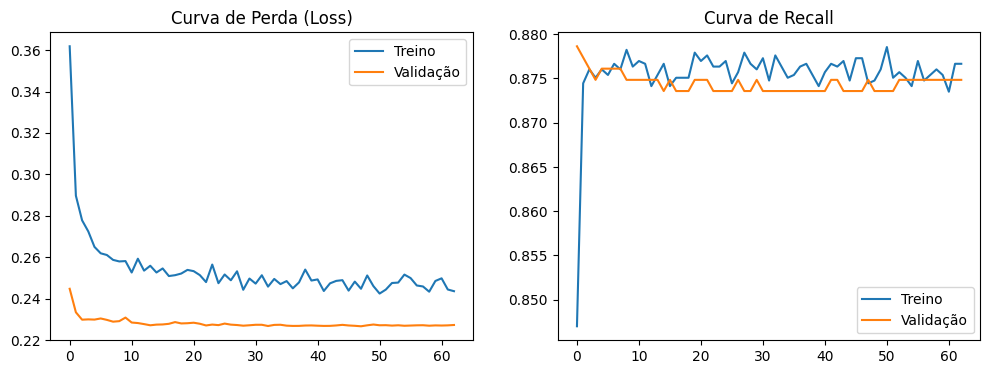

In [ ]:
print("Iniciando treinamento...")
history = model.fit(
    X_train_scaled,
    y_train,              
    epochs=200,          
    batch_size=32,        
    validation_split=0.2, 
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Perda (Loss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['recall'], label='Treino')
plt.plot(history.history['val_recall'], label='Validação')
plt.title('Curva de Recall')
plt.legend()

plt.show()

In [ ]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int) 
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1345
           1       0.96      0.87      0.91       991

    accuracy                           0.93      2336
   macro avg       0.94      0.92      0.93      2336
weighted avg       0.93      0.93      0.93      2336


Matriz de Confusão:
[[1308   37]
 [ 127  864]]
